In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [46]:
## Load and inspect data

In [47]:
df = pd.read_csv('CASchools.csv')
# Basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (420, 15)

First 5 rows:
   rownames  district                           school   county grades  \
0         1     75119               Sunol Glen Unified  Alameda  KK-08   
1         2     61499             Manzanita Elementary    Butte  KK-08   
2         3     61549      Thermalito Union Elementary    Butte  KK-08   
3         4     61457  Golden Feather Union Elementary    Butte  KK-08   
4         5     61523         Palermo Union Elementary    Butte  KK-08   

   students   teachers   calworks      lunch  computer  expenditure  \
0       195  10.900000   0.510200   2.040800        67  6384.911133   
1       240  11.150000  15.416700  47.916698       101  5099.380859   
2      1550  82.900002  55.032299  76.322601       169  5501.954590   
3       243  14.000000  36.475399  77.049202        85  7101.831055   
4      1335  71.500000  33.108601  78.427002       171  5235.987793   

      income    english        read        math  
0  22.690001   0.000000  691.599976  6

In [48]:
## Create target variable for classification  

In [49]:
q25, q75 = df['math'].quantile([0.25, 0.75])
df['performance'] = pd.cut(df['math'], 
                          bins=[df['math'].min()-1, q25, q75, df['math'].max()], 
                          labels=['Low', 'Medium', 'High'])

print("\nClass distribution:")
print(df['performance'].value_counts())

# Data types
print("\nData types:")
print(df.dtypes)
# Distribution of numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('rownames')  # Remove index column


Class distribution:
performance
Medium    210
Low       105
High      105
Name: count, dtype: int64

Data types:
rownames          int64
district          int64
school           object
county           object
grades           object
students          int64
teachers        float64
calworks        float64
lunch           float64
computer          int64
expenditure     float64
income          float64
english         float64
read            float64
math            float64
performance    category
dtype: object


In [50]:
## Calculate and visualize correlations

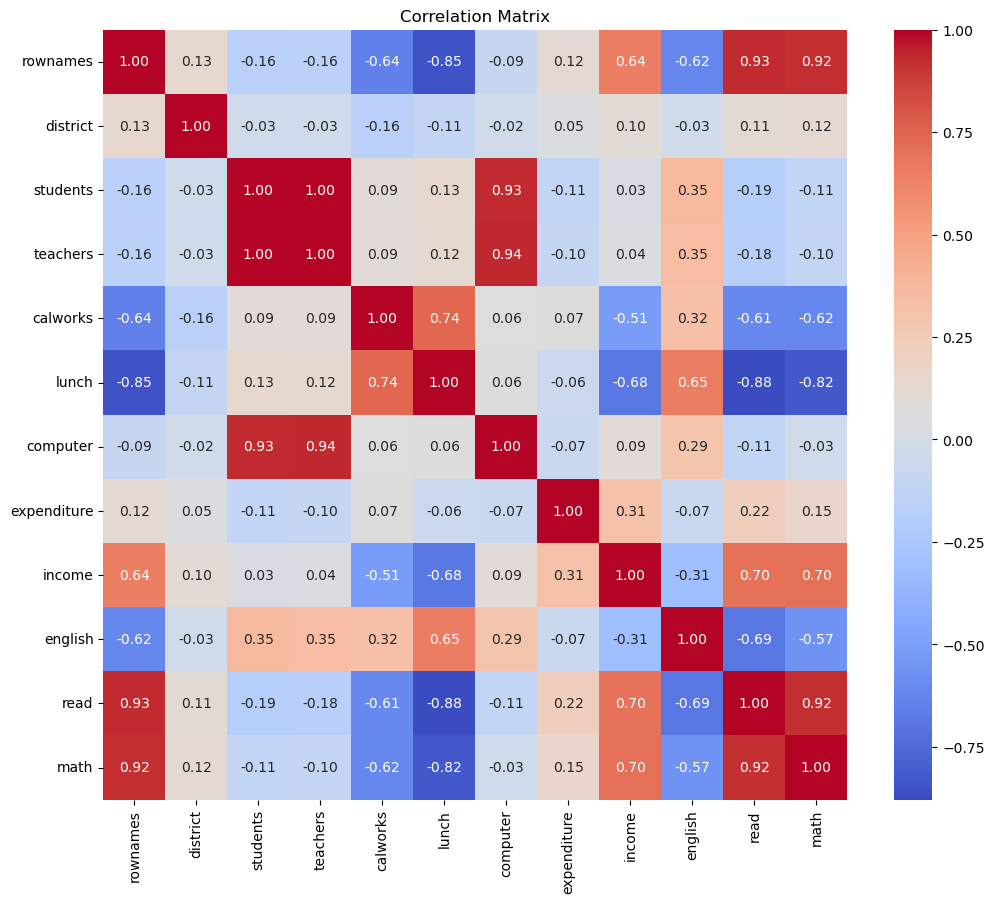

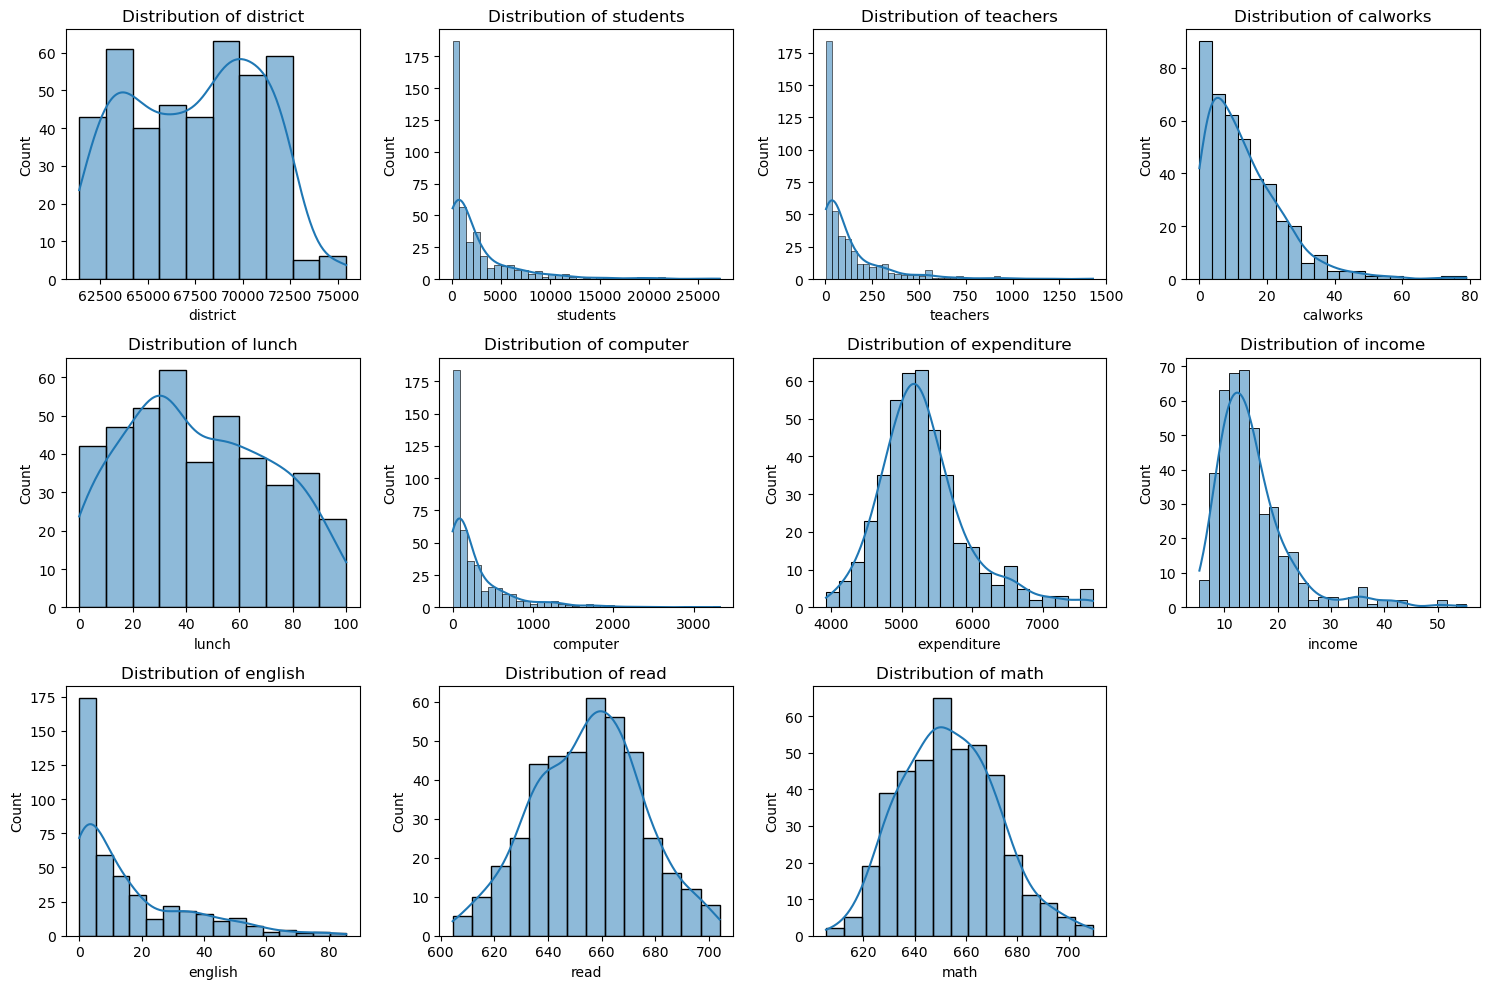

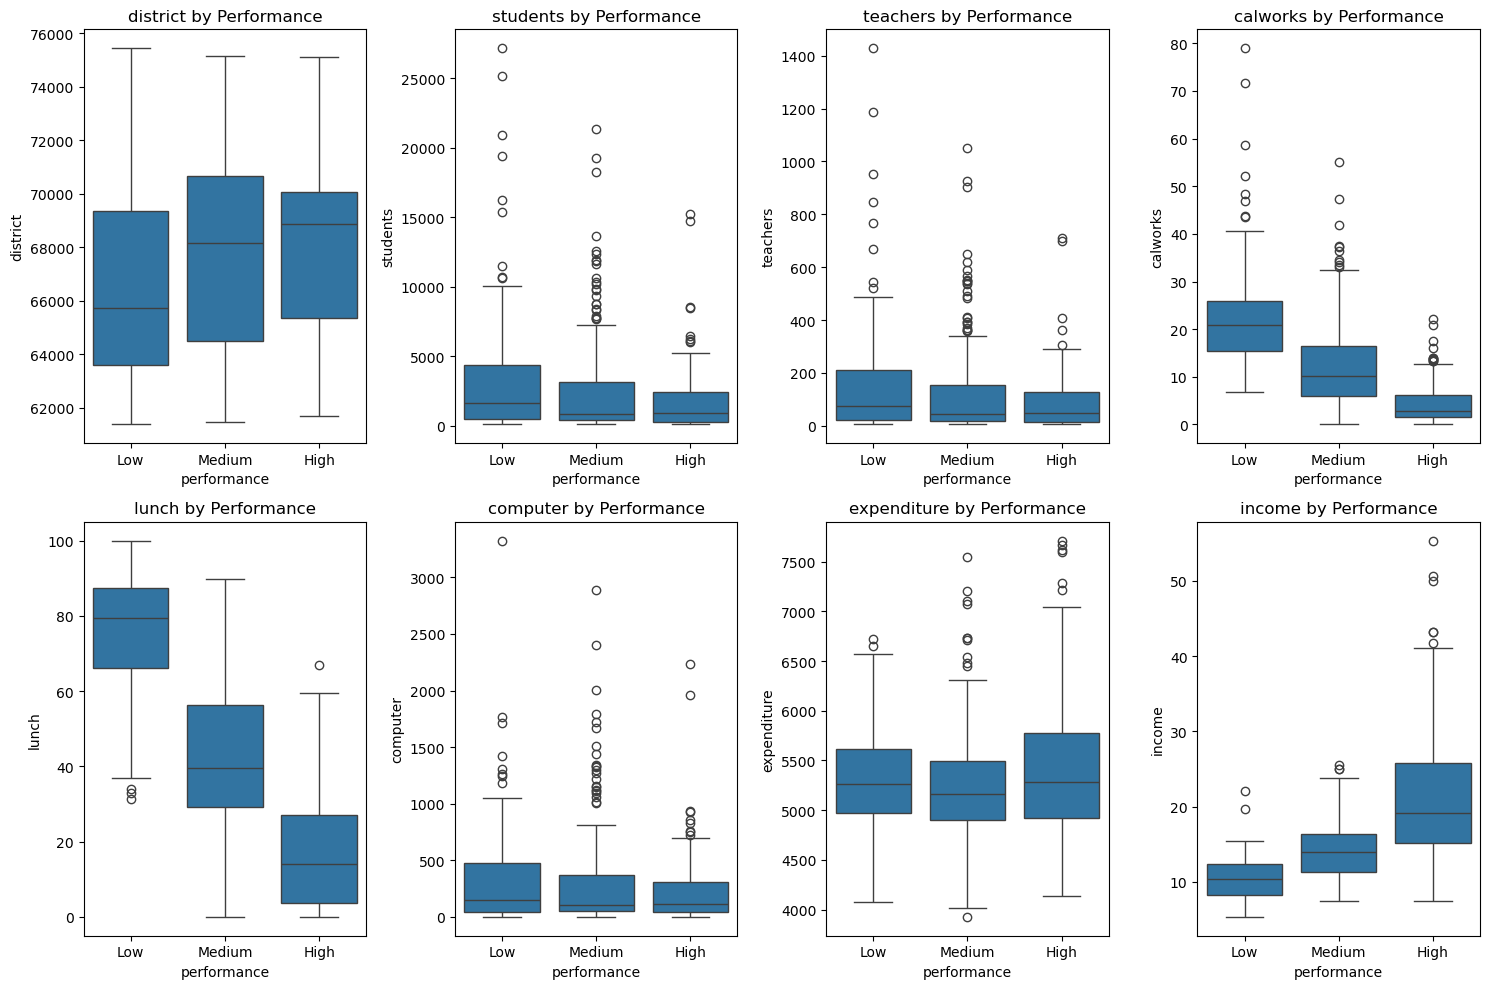

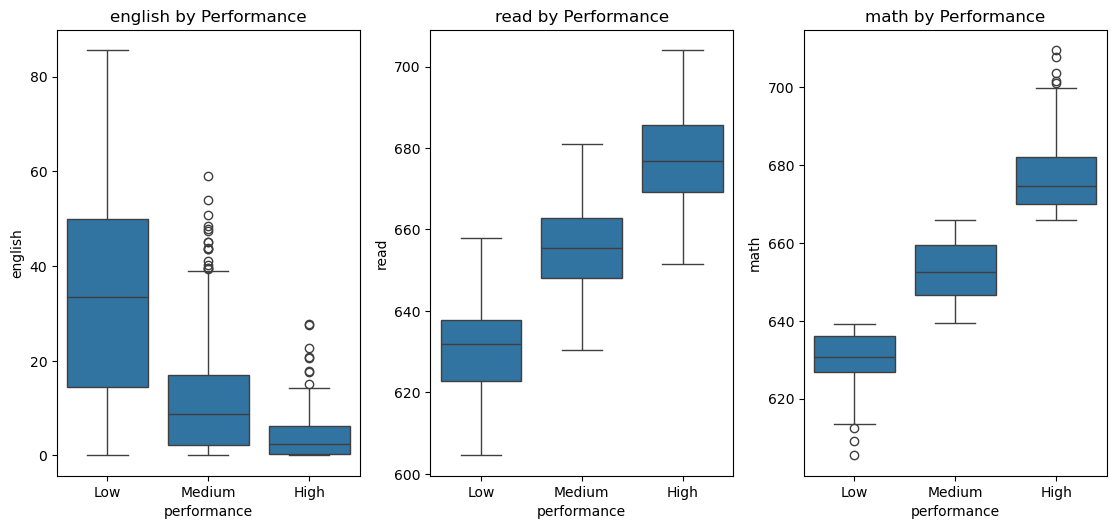

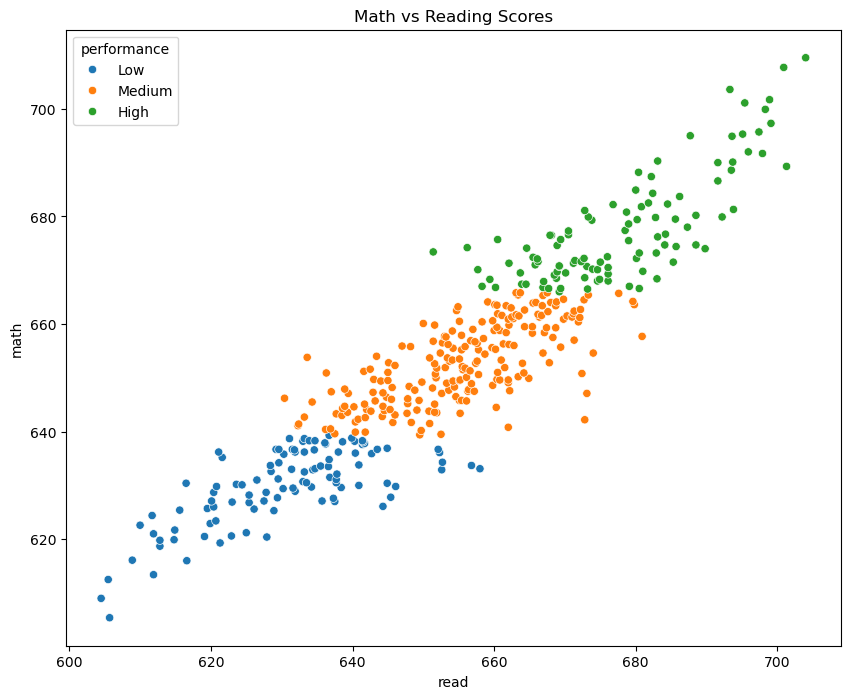

In [51]:
#Correlation analysis
plt.figure(figsize=(12, 10))
correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numerical_distributions.png')

# Boxplots for numerical features by performance category
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:8], 1):  # First 8 numerical columns
    plt.subplot(2, 4, i)
    sns.boxplot(x='performance', y=col, data=df)
    plt.title(f'{col} by Performance')
plt.tight_layout()
plt.savefig('boxplots_by_performance1.png')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[8:], 1):  # Remaining numerical columns
    plt.subplot(2, 4, i)
    sns.boxplot(x='performance', y=col, data=df)
    plt.title(f'{col} by Performance')
plt.tight_layout()
plt.savefig('boxplots_by_performance2.png')

# Scatter plots - math vs. read scores
plt.figure(figsize=(10, 8))
sns.scatterplot(x='read', y='math', hue='performance', data=df)
plt.title('Math vs Reading Scores')
plt.savefig('math_vs_read.png')


In [52]:
## Distributions, boxplots, and scatter plots

In [53]:

def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers.count()

print("\nNumber of outliers in each numerical column:")
for col in numerical_cols:
    print(f"{col}: {detect_outliers(df, col)}")



Number of outliers in each numerical column:
district: 0
students: 44
teachers: 41
calworks: 11
lunch: 0
computer: 38
expenditure: 18
income: 23
english: 20
read: 0
math: 2


In [54]:
## Feature comparison by performance


Statistics by performance class:

Low Performance Statistics:
           students     teachers    calworks       lunch      income  \
count    105.000000   105.000000  105.000000  105.000000  105.000000   
mean    3481.857143   167.556999   23.026569   75.827151   10.602124   
std     5139.716719   244.802754   12.415593   16.153842    2.884984   
min      103.000000     5.000000    6.840700   31.386900    5.335000   
25%      452.000000    22.000000   15.319900   66.194901    8.258000   
50%     1588.000000    75.080002   20.927401   79.512001   10.364429   
75%     4340.000000   211.000000   25.921101   87.316399   12.301800   
max    27176.000000  1429.000000   78.994202  100.000000   22.059999   

          english        read        math  
count  105.000000  105.000000  105.000000  
mean    33.157579  630.694289  630.029524  
std     22.391562   11.451854    7.098277  
min      0.000000  604.500000  605.400024  
25%     14.429193  622.900024  626.799988  
50%     33.487709  631.7

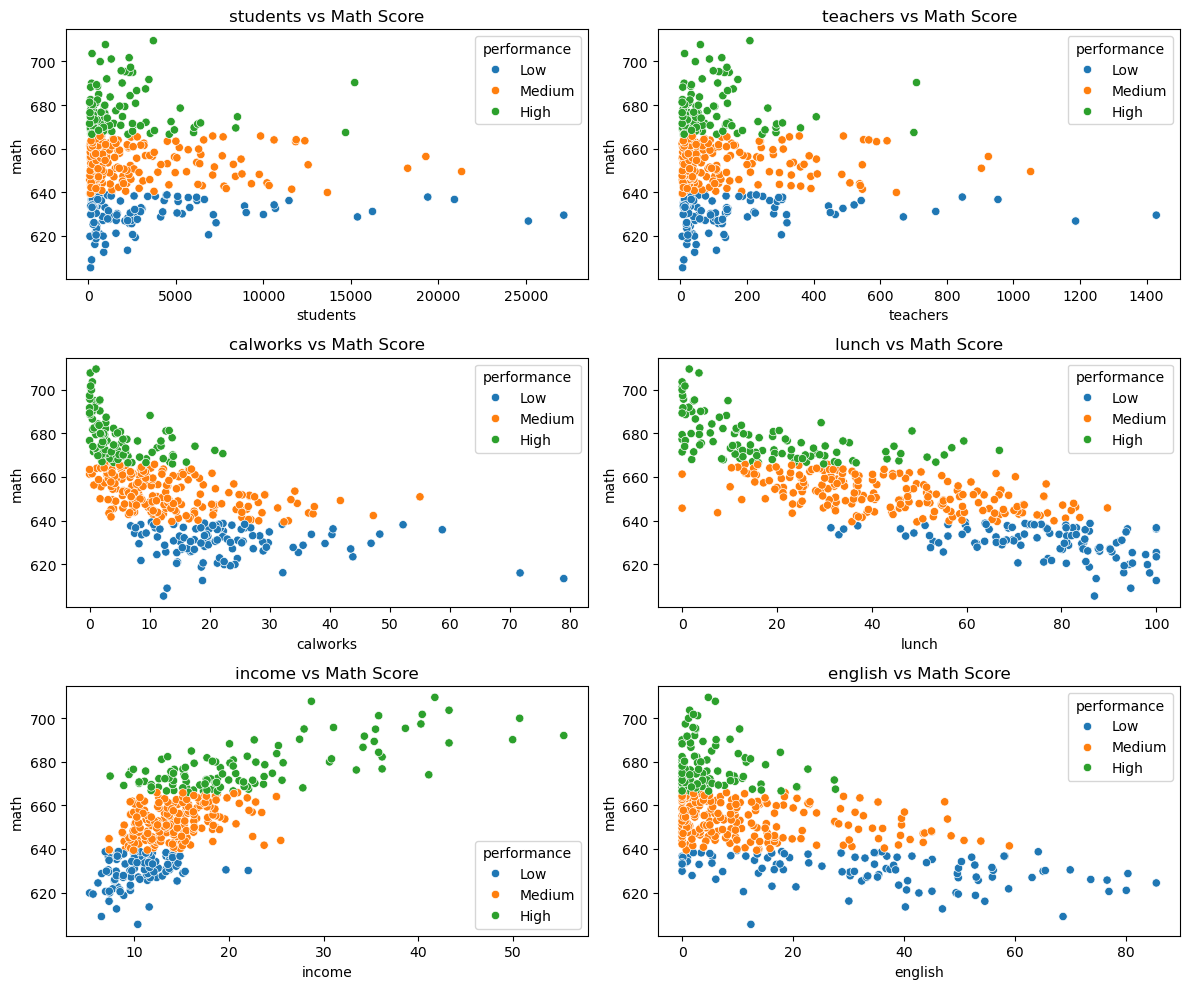

In [55]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(['students', 'teachers', 'calworks', 'lunch', 'income', 'english'], 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=col, y='math', hue='performance', data=df)
    plt.title(f'{col} vs Math Score')
plt.tight_layout()
plt.savefig('features_vs_math.png')

# Statistics by class
print("\nStatistics by performance class:")
for category in ['Low', 'Medium', 'High']:
    print(f"\n{category} Performance Statistics:")
    class_df = df[df['performance'] == category]
    print(class_df.describe()[['students', 'teachers', 'calworks', 'lunch', 'income', 'english', 'read', 'math']])

In [56]:
# Encode categorical variables
encoder = LabelEncoder()
for col in ['grades', 'county']:
    df[col + '_encoded'] = encoder.fit_transform(df[col])

# Save processed dataset
df.to_csv('CASchools_processed.csv', index=False)

In [ ]:
# inside folder Part1_plots exist all plots please check it